# Problem 1, Parts C-E: Stochastic Gradient Descent Visualization

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from sgd_helper import (
    generate_dataset1,
    generate_dataset2,
    plot_dataset,
    plot_loss_function,
    animate_convergence,
    animate_sgd_suite,
)

## Problem 1C: Implementation of SGD

Fill in the loss, gradient, and SGD functions according to the guidelines given in the problem statement in order to perform SGD.

In [43]:
def loss(X, Y, w):
    """
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    """

    Loss = 0
    N = X.shape[0]

    for i in range(N):
        Loss += (Y[i] - np.dot(w, X[i])) ** 2

    return Loss / N


def gradient(x, y, w):
    """
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    """
    return -2 * (y - np.dot(w, x)) * x

def SGD(X, Y, w_start, eta, N_epochs):
    """
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initializationm like.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    """

    W = np.zeros((N_epochs, len(w_start)))
    losses = np.zeros(N_epochs)

    w = w_start.copy()

    for epoch in range(N_epochs):
        W[epoch] = w.copy()
        losses[epoch] = loss(X, Y, w)

        # Shuffle the data points
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i in range(X.shape[0]):
            x_i = X_shuffled[i]
            y_i = Y_shuffled[i]
            grad = gradient(x_i, y_i, w)
            w -= eta * grad

    return W, losses

## Problem 1D: Visualization

### Dataset

We'll start off by generating two simple 2-dimensional datasets. 
For simplicity, we do not consider separate training and test sets.

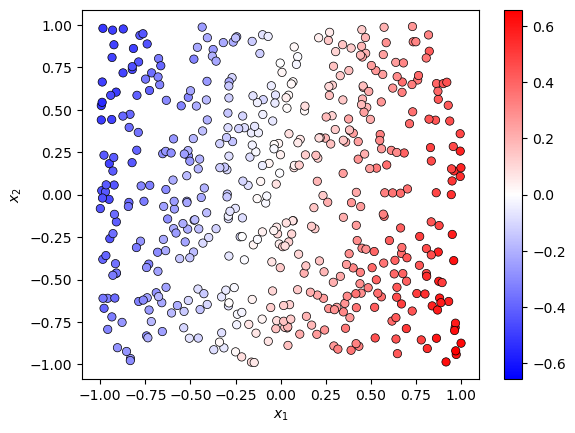

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x_1$', ylabel='$x_2$'>)

In [44]:
X1, Y1 = generate_dataset1()
plot_dataset(X1, Y1)

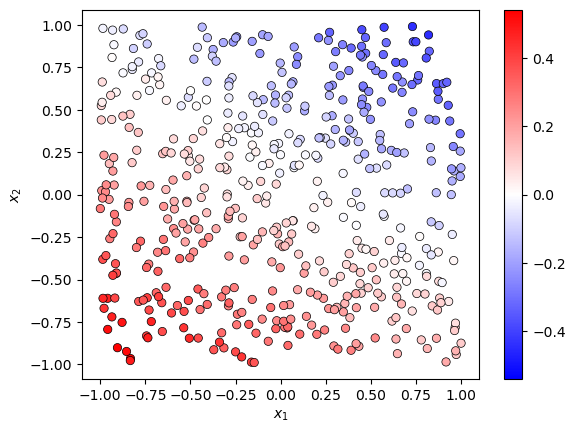

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x_1$', ylabel='$x_2$'>)

In [45]:
X2, Y2 = generate_dataset2()
plot_dataset(X2, Y2)

### SGD from a single point

First, let's visualize SGD from a single starting point:

Let's view how the weights change as the algorithm converges:

In [ ]:
# Parameters to feed the SGD.
params = ({"w_start": [0.01, 0.01], "eta": 0.00001},)
N_epochs = 1000
FR = 20

# Let's do it!
W, _ = SGD(X1, Y1, params[0]["w_start"], params[0]["eta"], N_epochs)
anim = animate_convergence(X1, Y1, W, FR)
anim.save("animation2.gif", fps=30, writer="imagemagick")
Image(open("animation2.gif", "rb").read())

### SGD from multiple points

Now, let's visualize SGD from multiple arbitrary starting points:

In [ ]:
# Parameters to feed the SGD.
# Here, we specify each different set of initializations as a dictionary.
params = (
    {"w_start": [-0.8, -0.3], "eta": 0.00001},
    {"w_start": [-0.9, 0.4], "eta": 0.00001},
    {"w_start": [-0.4, 0.9], "eta": 0.00001},
    {"w_start": [0.8, 0.8], "eta": 0.00001},
)
N_epochs = 1000
FR = 20

# Let's go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save("animation3.gif", fps=30, writer="imagemagick")
Image(open("animation3.gif", "rb").read())

Let's do the same thing but with a different dataset:

In [ ]:
# Parameters to feed the SGD.
params = (
    {"w_start": [-0.8, -0.3], "eta": 0.00001},
    {"w_start": [-0.9, 0.4], "eta": 0.00001},
    {"w_start": [-0.4, 0.9], "eta": 0.00001},
    {"w_start": [0.8, 0.8], "eta": 0.00001},
)
N_epochs = 1000
FR = 20

# Animate!
anim = animate_sgd_suite(SGD, loss, X2, Y2, params, N_epochs, FR)
anim.save("animation4.gif", fps=30, writer="imagemagick")
Image(open("animation4.gif", "rb").read())

## Problem 1E: SGD with different step sizes

Now, let's visualize SGD with different step sizes (eta):

(For ease of visualization: the trajectories are ordered from left to right by increasing eta value. Also, note that we use smaller values of `N_epochs` and `FR` here for easier visualization.)

In [ ]:
# Parameters to feed the SGD.
params = (
    {"w_start": [0.7, 0.8], "eta": 0.00001},
    {"w_start": [0.2, 0.8], "eta": 0.00005},
    {"w_start": [-0.2, 0.7], "eta": 0.0001},
    {"w_start": [-0.6, 0.6], "eta": 0.0002},
)
N_epochs = 100
FR = 2

# Go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save("animation5.gif", fps=30, writer="imagemagick")
Image(open("animation5.gif", "rb").read())

### Plotting SGD Convergence

Let's visualize the difference in convergence rates a different way. Plot the loss with respect to epoch (iteration) number for each value of eta on the same graph.

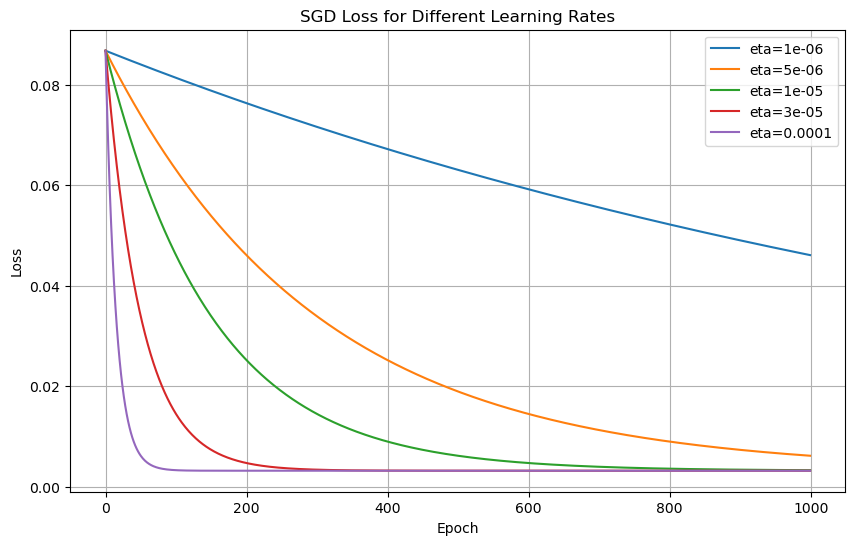

In [47]:
"""Plotting SGD convergence"""

eta_vals = [1e-6, 5e-6, 1e-5, 3e-5, 1e-4]
w_start = [0.01, 0.01]
N_epochs = 1000

plt.figure(figsize=(10, 6))
for eta in eta_vals:
    _, losses = SGD(X1, Y1, w_start, eta, N_epochs)
    plt.plot(losses, label=f"eta={eta}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SGD Loss for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()

Clearly, a big step size results in fast convergence! Why don't we just set eta to a really big value, then? Say, eta=1?

(Again, note that the FR is lower for this animation.)

In [ ]:
# Parameters to feed the SGD.
params = ({"w_start": [0.01, 0.01], "eta": 1},)
N_epochs = 100
FR = 2

# Voila!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save("animation6.gif", fps=30, writer="imagemagick")
Image(open("animation6.gif", "rb").read())

Just for fun, let's try eta=10 as well. What happens? (Hint: look at W)

In [ ]:
# Parameters to feed the SGD.
w_start = [0.01, 0.01]
eta = 10
N_epochs = 100

# Presto!
W, losses = SGD(X1, Y1, w_start, eta, N_epochs)

the weight explodes

## Extra Visualization (not part of the homework problem)

One final visualization! What happens if the loss function has multiple optima?

In [ ]:
# Import different SGD & loss functions.
# In particular, the loss function has multiple optima.
from sgd_multiopt_helper import SGD, loss

# Parameters to feed the SGD.
params = (
    {"w_start": [0.9, 0.9], "eta": 0.01},
    {"w_start": [0.0, 0.0], "eta": 0.01},
    {"w_start": [-0.8, 0.6], "eta": 0.01},
    {"w_start": [-0.8, -0.6], "eta": 0.01},
    {"w_start": [-0.4, -0.3], "eta": 0.01},
)
N_epochs = 100
FR = 2

# One more time!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save("animation7.gif", fps=30, writer="imagemagick")
Image(open("animation7.gif", "rb").read())

if the learning rate is small enough it can get stuck in a local minima

# Problem 1, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 1 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [49]:
%matplotlib inline

## Problem 1F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [50]:
del loss, gradient, SGD

def loss(X, Y, w):
    """
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    """

    Loss = 0
    N = X.shape[0]

    for i in range(N):
        Loss += (Y[i] - np.dot(w, X[i])) ** 2
    return Loss / N

def gradient(x, y, w):
    """
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    """

    return -2 * (y - np.dot(w, x)) * x

def SGD(X, Y, w_start, eta, N_epochs):
    """
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    """

    losses = np.zeros(N_epochs)

    w = w_start.copy()

    for epoch in range(N_epochs):
        losses[epoch] = loss(X, Y, w)

        # Shuffle the data points
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i in range(X.shape[0]):
            x_i = X_shuffled[i]
            y_i = Y_shuffled[i]
            grad = gradient(x_i, y_i, w)
            w -= eta * grad

    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [51]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: Given as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=",")

Now, load the dataset in `../data/sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [52]:
data = load_data("../data/sgd_data.csv")
X = data[:, :4]
Y = data[:, 4]

w_start = [0.001, 0.001, 0.001, 0.001]
eta = np.exp(-15)
N_epochs = 800

bias = 0.001

# append the bias to X and w_start
X = np.hstack((X, np.ones((X.shape[0], 1))))
w_start = np.append(w_start, bias)

# print first few data points
print(X[:5])
print(Y[:5])

w, losses = SGD(X, Y, w_start, eta, N_epochs)
print("Final weights:", w)

[[8.55834 3.08451 1.79961 6.61568 1.     ]
 [4.08455 8.66603 2.8698  1.67996 1.     ]
 [1.93701 8.9219  8.99454 0.56534 1.     ]
 [3.11286 7.36286 4.35027 7.14242 1.     ]
 [5.52064 3.46109 6.07592 2.77215 1.     ]]
[  0.45023  -7.29982 -74.71018  22.2565  -66.01461]
Final weights: [ -5.94209018   3.94392493 -11.72381711   8.78570506  -0.22716207]


## Problem 1G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

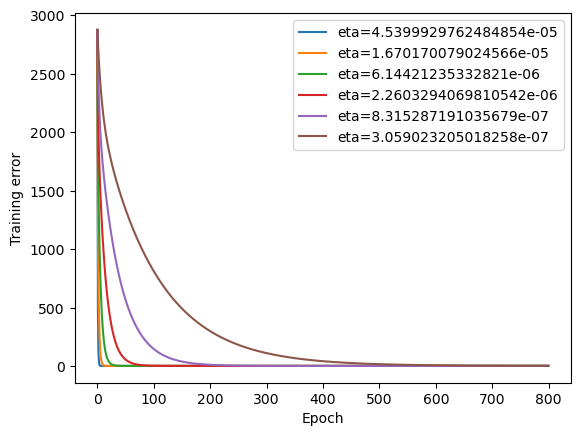

In [53]:
eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
w_start = [0.001, 0.001, 0.001, 0.001, bias]
N_epochs = 800

plt.figure()

for eta in eta_vals:
    w_final, losses = SGD(X, Y, np.array(w_start), eta, N_epochs)
    plt.plot(losses, label=f"eta={eta}")

plt.xlabel("Epoch")
plt.ylabel("Training error")
plt.legend()
plt.show()

## Problem 1H

Provide your code for computing the least-squares analytical solution below.

In [54]:
w_closed = np.linalg.inv(X.T @ X) @ (X.T @ Y)

print("SGD final weight: ", w_final)
print("Closed form: ", w_closed)
print("Difference (%): ", (w_closed - w_final) / w_final * 100)

SGD final weight:  [ -5.94211258   3.94389725 -11.72384395   8.78567548  -0.22718511]
Closed form:  [ -5.99157048   4.01509955 -11.93325972   8.99061096  -0.31644251]
Difference (%):  [ 0.83232869  1.80537941  1.78623808  2.3326093  39.28840273]


## Problem 1I
Is there any reason to use SGD when a closed-form solution exists?

Yes, as for large datasets (high dimensionality) calculating this is very computationally heavy.